In [1]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('Online Retail.xlsx')

In [3]:
df.head() #checking head of our dataframe

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.info() #information about our data ---Shape, dtypes columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
df.isnull().sum() #checking for null values

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
len(df[df['Quantity']<0])  #checking for anamolies in Quantity column

10624

In [7]:
df = df[~df['Quantity']<0] #dropping irrerelavent values

In [8]:
df.dropna(inplace=True) #dropping null values

In [9]:
len(df[df['UnitPrice']==0]) #checking for values where unit price is 0

40

In [10]:
df = df[df['UnitPrice']>0] #dropping those 0 values

In [11]:
df['Amount'] = df['UnitPrice']*df['Quantity'] #deriving total from data by Multipling price of one item with number of items sold

In [12]:
df['Month']=df['InvoiceDate'].dt.month
df['Year']=df['InvoiceDate'].dt.year  #extracting Month, year,weekday from Invoice date
df['Day']=df['InvoiceDate'].dt.strftime('%A')

In [13]:
df.describe(exclude='object') #deriving descriptive statistics of our data

,Quantity,InvoiceDate,UnitPrice,CustomerID,Amount,Month,Year
count,397884.000000,397884,397884.000000,397884.000000,397884.000000,397884.000000,397884.000000
mean,12.988238,2011-07-10 23:41:23.511023360,3.116488,15294.423453,22.397000,7.612475,2010.934260
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000,0.001000,1.000000,2010.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000,4.680000,5.000000,2011.000000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000,11.800000,8.000000,2011.000000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000,19.800000,11.000000,2011.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000,168469.600000,12.000000,2011.000000
std,179.331775,NaN,22.097877,1713.141560,309.071041,3.416520,0.247828


In [14]:
import seaborn as sns #importing plotting libraries
import matplotlib.pyplot as plt 
#optional imports

import plotly.express as px
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)
cf.go_offline()

<Axes: xlabel='CustomerID'>

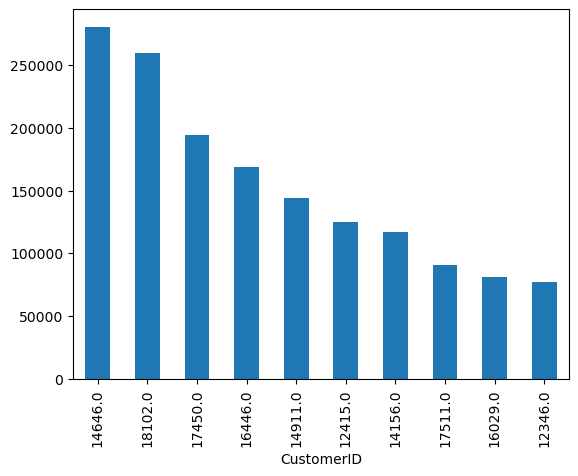

In [31]:
#df.groupby('CustomerID')['Amount'].sum().sort_values(ascending=False).head(10).plot(kind='bar')

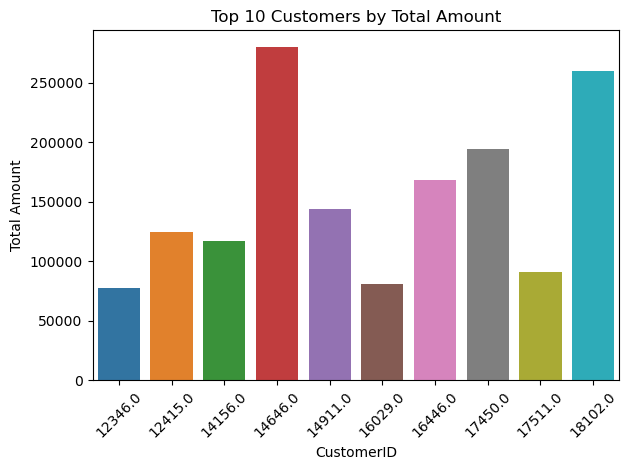

In [15]:
customer_totals = df.groupby('CustomerID')['Amount'].sum().sort_values(ascending=False).head(10)

customer_df = pd.DataFrame({'CustomerID': customer_totals.index, 'Total Amount': customer_totals.values})

sns.barplot(x='CustomerID', y='Total Amount', data=customer_df)
plt.xlabel('CustomerID')
plt.ylabel('Total Amount')
plt.title('Top 10 Customers by Total Amount')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()


<Axes: xlabel='Country'>

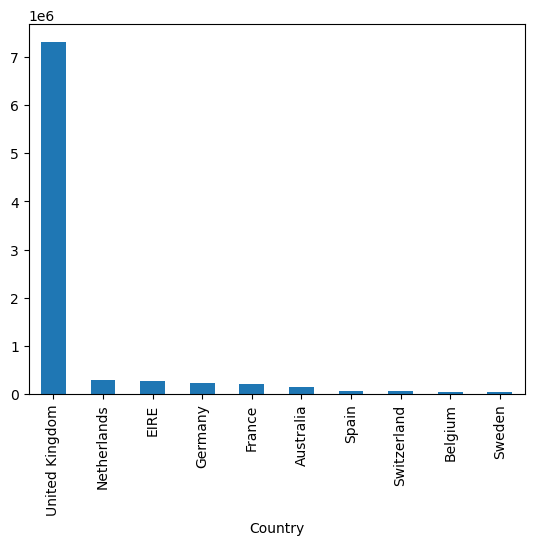

In [16]:
df.groupby('Country')['Amount'].sum().nlargest(10).plot.bar() #UK dominating sales by very big margin

<Axes: xlabel='Country'>

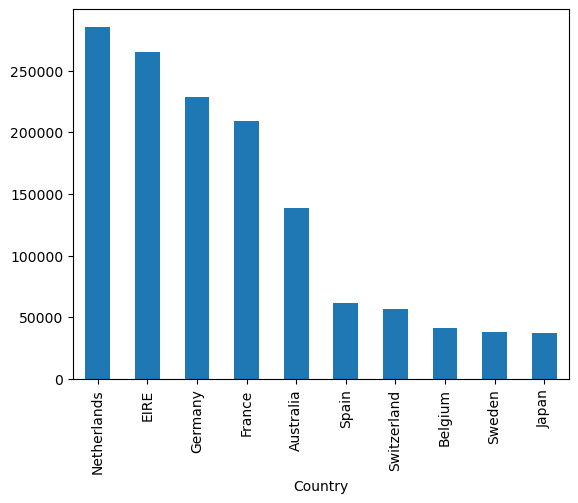

In [17]:
Country = df.groupby('Country')['Amount'].sum().nlargest(15)
Country[1:11].plot(kind="bar") #let's visualize data from second place to check remaining countries sale


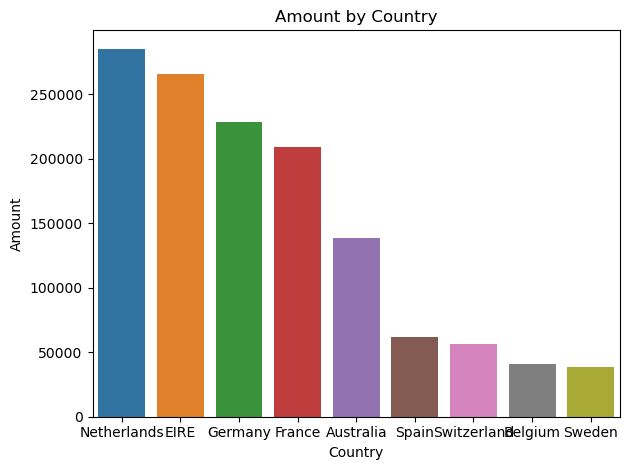

In [18]:
Country_df = pd.DataFrame({'Country':Country.index,'Amount':Country.values})

#we can also plot using seaborn

sns.barplot(data=Country_df,x=Country_df['Country'][1:10],y='Amount')
plt.xlabel('Country')   
plt.ylabel('Amount')
plt.title('Amount by Country')
plt.tight_layout()
plt.show()

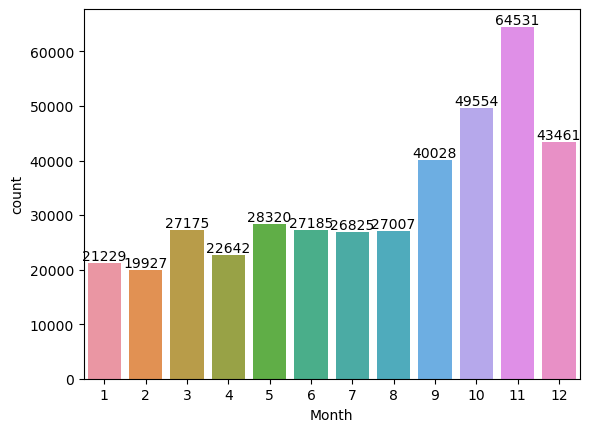

In [19]:
ax = sns.countplot(data = df, x = 'Month')
plt.bar_label(ax.containers[0]) # month wise sales in overall countries
plt.show()

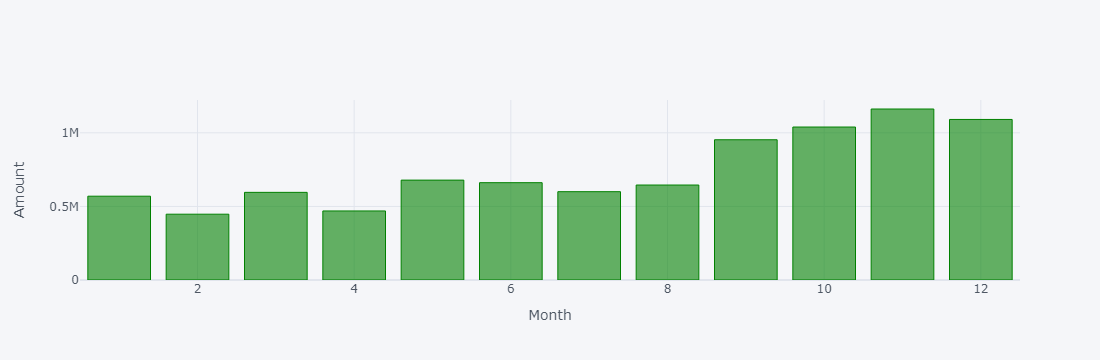

In [20]:
df.groupby('Month')['Amount'].sum().iplot(kind='bar',color='Green',xTitle='Month',yTitle='Amount') #intractive plots

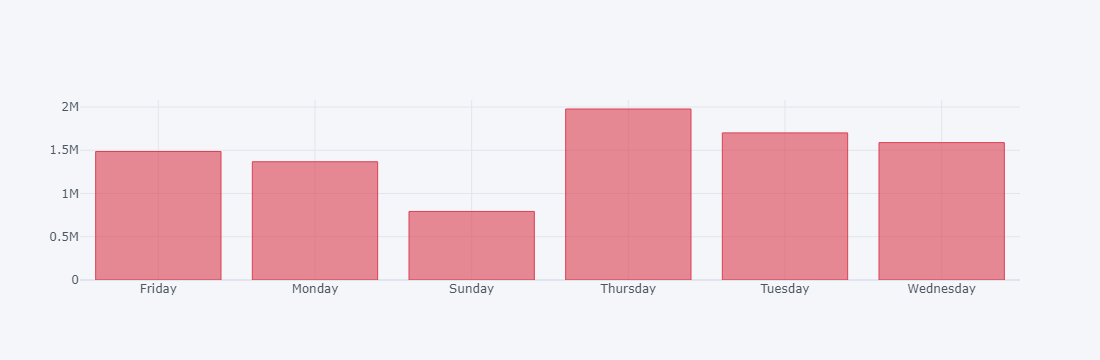

In [21]:
df.groupby('Day')['Amount'].sum().iplot(kind='bar',color='red') # day wise sales

In [22]:
df.groupby('Day')['Amount'].sum()

Day
Friday       1485917.401
Monday       1367146.411
Sunday        792514.221
Thursday     1976859.070
Tuesday      1700634.631
Wednesday    1588336.170
Name: Amount, dtype: float64

In [23]:
df['Day'].value_counts()

Day
Thursday     80035
Wednesday    68885
Tuesday      66473
Monday       64893
Sunday       62773
Friday       54825
Name: count, dtype: int64

<Axes: xlabel='Day', ylabel='count'>

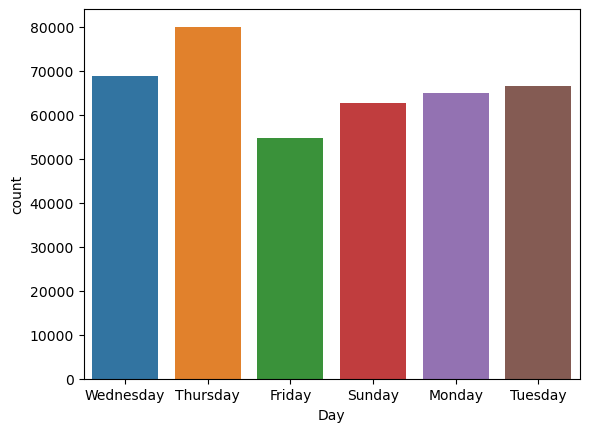

In [24]:
sns.countplot(data=df,x='Day')

<Axes: xlabel='Description'>

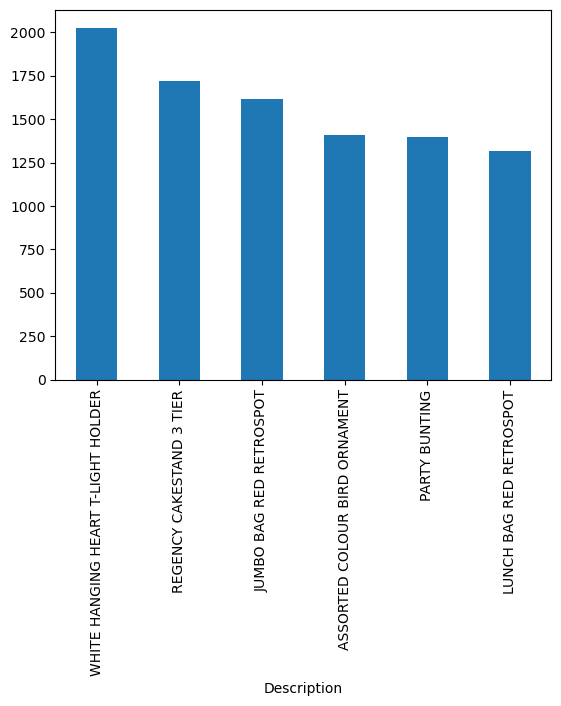

In [25]:
product=df['Description'].value_counts().sort_values(ascending=False).head(6)
product.plot.bar() # top sold product

<Axes: xlabel='Quantity', ylabel='UnitPrice'>

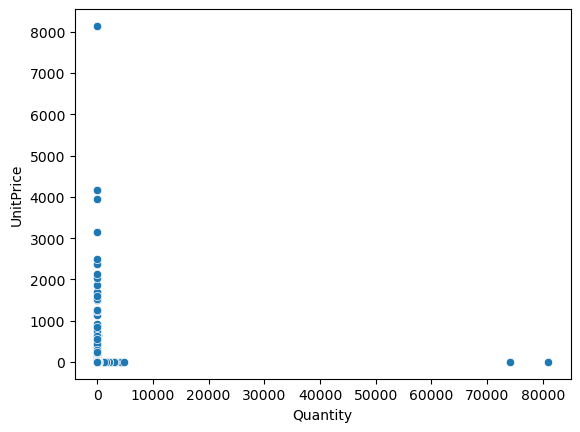

In [45]:
sns.scatterplot(df,x='Quantity',y='UnitPrice') # we can see extreme values on Quantity and UnitPrice

In [69]:
df3 = df[['Amount','UnitPrice','CustomerID','Month','Quantity','Year']]

In [70]:
# Calculate the first quartile (Q1)
Q1 = df3.quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = df3.quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the threshold for identifying outliers
threshold = 1.5

# Identify outliers using the IQR method
outliers = df3[((df3 < (Q1 - threshold * IQR)) | (df3 > (Q3 + threshold * IQR))).any(axis=1)]

# Remove outliers from the dataset
cleaned_df3 = df3[~((df3 < (Q1 - threshold * IQR)) | (df3 > (Q3 + threshold * IQR))).any(axis=1)]

# Print the shape of the original and cleaned datasets
print("Original dataset shape:", df3.shape)
print("Cleaned dataset shape:", cleaned_df3.shape)


Original dataset shape: (397884, 6)
Cleaned dataset shape: (307295, 6)


<Axes: xlabel='Quantity', ylabel='UnitPrice'>

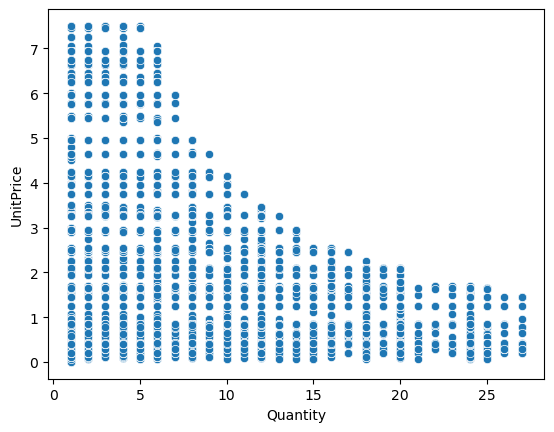

In [76]:
sns.scatterplot(cleaned_df3,x='Quantity',y='UnitPrice') 

<Axes: xlabel='Month', ylabel='Amount'>

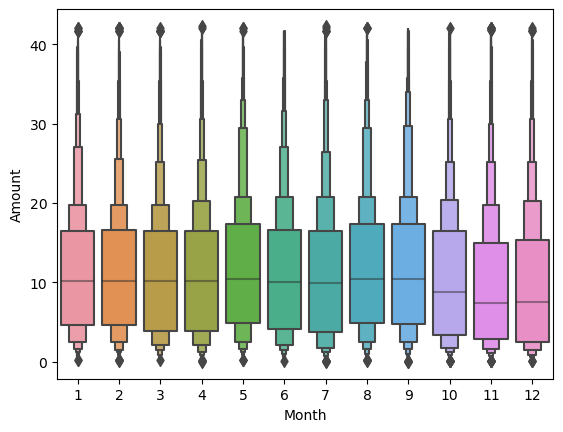

In [77]:
sns.boxenplot(cleaned_df3,x='Month',y='Amount') #After cleaning

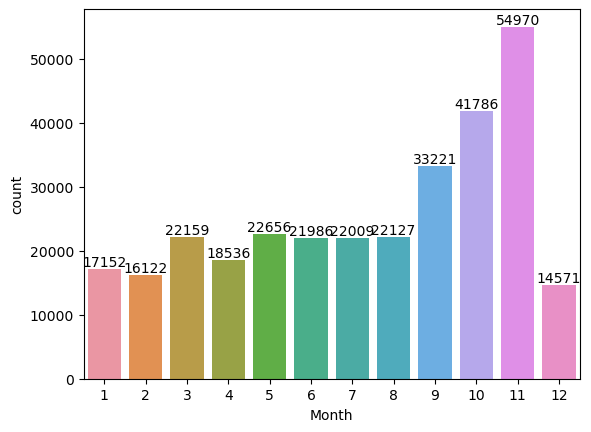

In [82]:
ax = sns.countplot(data = cleaned_df3, x = 'Month')
plt.bar_label(ax.containers[0]) # month wise sales for 12th month has decreased tremendeously after removing outliers
plt.show()

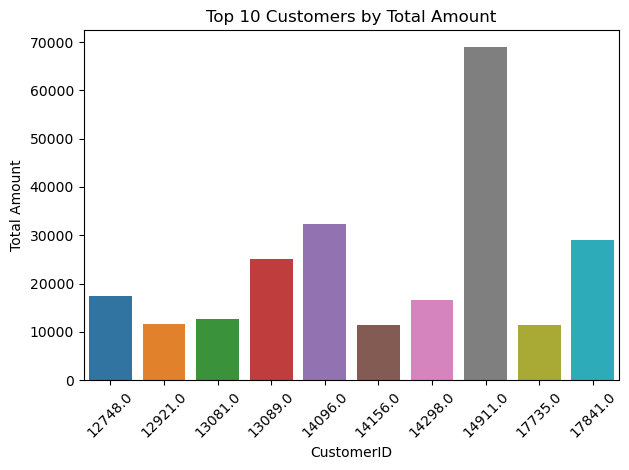

In [83]:
customer_totals = cleaned_df3.groupby('CustomerID')['Amount'].sum().sort_values(ascending=False).head(10)
customer_df = pd.DataFrame({'CustomerID': customer_totals.index, 'Total Amount': customer_totals.values})

sns.barplot(x='CustomerID', y='Total Amount', data=customer_df)     #top customer also effected after removing outliers 14911

plt.xlabel('CustomerID')
plt.ylabel('Total Amount')
plt.title('Top 10 Customers by Total Amount')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()


Conclusion

Top customer: 14911

Top country: UK

Top Month: 11

Top Product :White Hanging Heart with T-light Handle